In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Final_Product_Data.csv')

In [3]:
data.head()

,Date,Product Name,Price,Quantity Sold,Total
0,2024-01-01,Kadhai medium,450,2,900
1,2024-01-01,Kadhai small,350,1,350
2,2024-01-01,Knife Set,250,2,500
3,2024-01-01,Kadhai small,350,3,1050
4,2024-01-01,Plastic Fork set,40,2,80


In [4]:
grouped_data = data.groupby('Product Name').agg({'Total': 'sum'}).sort_values(by='Total', ascending=False)

# Display the grouped data
grouped_data.head()


,Total
Product Name,
Kadhai medium,59400
Patila 2l,54400
Bhoj Thali,46650
Bucket (Steel),42000
Kadhai small,42000


In [5]:
grouped_data['Cumulative Sum'] = grouped_data['Total'].cumsum()
grouped_data['Cumulative Percentage'] = 100 * grouped_data['Cumulative Sum'] / grouped_data['Total'].sum()

# Display the data with cumulative calculations
grouped_data.head()


,Total,Cumulative Sum,Cumulative Percentage
Product Name,,,
Kadhai medium,59400,59400,5.939899
Patila 2l,54400,113800,11.379807
Bhoj Thali,46650,160450,16.044727
Bucket (Steel),42000,202450,20.244656
Kadhai small,42000,244450,24.444584


In [6]:
def classify(row):
    if row['Cumulative Percentage'] <= 70:
        return 'A'
    elif row['Cumulative Percentage'] <= 90:
        return 'B'
    else:
        return 'C'

grouped_data['ABC Category'] = grouped_data.apply(classify, axis=1)

# Display the categorized data
grouped_data.head()


,Total,Cumulative Sum,Cumulative Percentage,ABC Category
Product Name,,,,
Kadhai medium,59400,59400,5.939899,A
Patila 2l,54400,113800,11.379807,A
Bhoj Thali,46650,160450,16.044727,A
Bucket (Steel),42000,202450,20.244656,A
Kadhai small,42000,244450,24.444584,A


In [7]:
# Display A category products
a_category = grouped_data[grouped_data['ABC Category'] == 'A']
print("A Category Products:")
print(a_category)

# Display B category products
b_category = grouped_data[grouped_data['ABC Category'] == 'B']
print("\nB Category Products:")
print(b_category)

# Display C category products
c_category = grouped_data[grouped_data['ABC Category'] == 'C']
print("\nC Category Products:")
print(c_category)


A Category Products:
                                 Total  Cumulative Sum  Cumulative Percentage  \
Product Name                                                                    
Kadhai medium                    59400           59400               5.939899   
Patila 2l                        54400          113800              11.379807   
Bhoj Thali                       46650          160450              16.044727   
Bucket (Steel)                   42000          202450              20.244656   
Kadhai small                     42000          244450              24.444584   
Thali 20inch                     37980          282430              28.242520   
Patila 3l                        37400          319830              31.982456   
Tiffin (Steel)                   35550          355380              35.537396   
Thali 15inch                     28320          383700              38.369348   
Knife Set                        27500          411200              41.119301   
Cello W

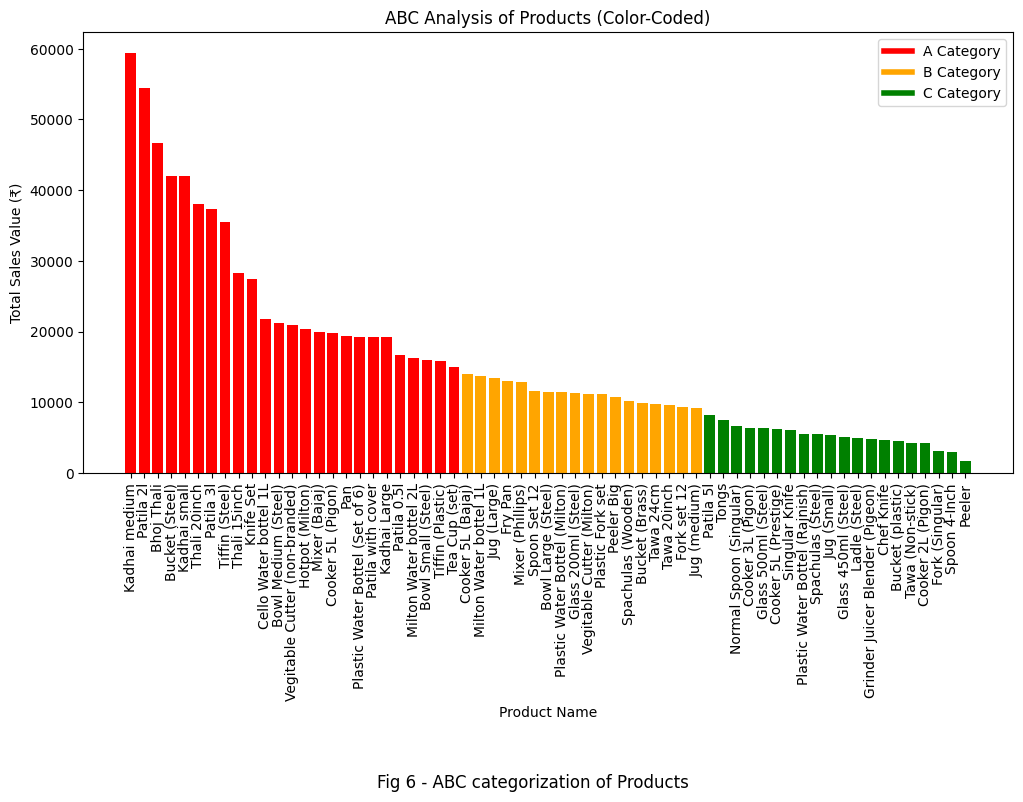

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assign colors based on the ABC category
colors = grouped_data['ABC Category'].map({'A': 'red', 'B': 'orange', 'C': 'green'})

plt.figure(figsize=(12, 7))
plt.bar(grouped_data.index, grouped_data['Total'], color=colors)

# Improve the labels and title
plt.title('ABC Analysis of Products (Color-Coded)')
plt.xlabel('Product Name')
plt.ylabel('Total Sales Value (₹)')
plt.xticks(rotation=90)
plt.legend(handles=[plt.Line2D([0], [0], color='red', lw=4, label='A Category'),
                    plt.Line2D([0], [0], color='orange', lw=4, label='B Category'),
                    plt.Line2D([0], [0], color='green', lw=4, label='C Category')],
           loc='best')

# Adjust layout to avoid label overlap
plt.subplots_adjust(bottom=0.25)

plt.figtext(0.5, -0.2, "Fig 6 - ABC categorization of Products", ha="center", fontsize=12)

plt.show()


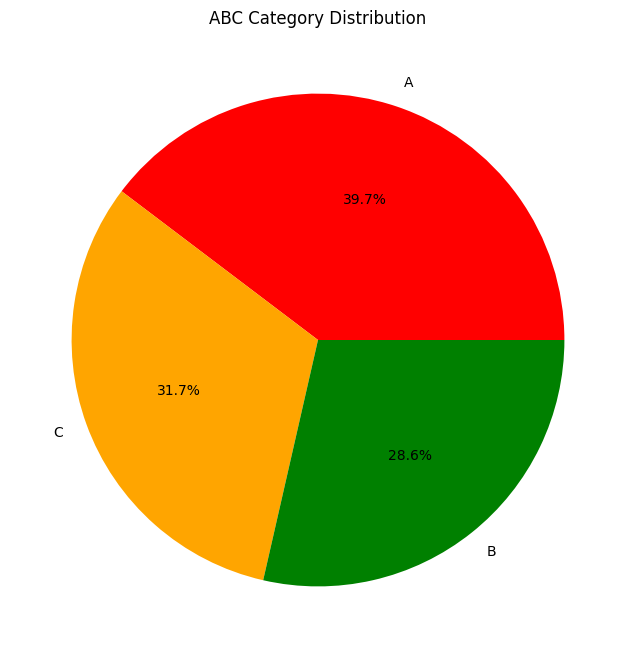

In [9]:
# Count the number of products in each category
category_counts = grouped_data['ABC Category'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['red', 'orange', 'green'])
plt.title('ABC Category Distribution')
plt.show()


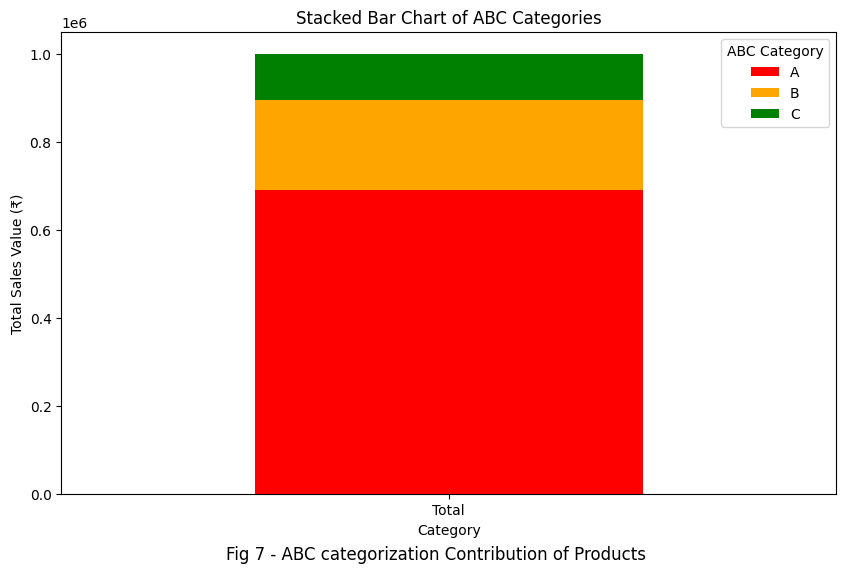

In [10]:
# Assume the data is grouped by category and summed over the desired dimension
grouped_by_category = grouped_data.groupby('ABC Category').agg({'Total': 'sum'})

# Plot a stacked bar chart
grouped_by_category.T.plot(kind='bar', stacked=True, color=['red', 'orange', 'green'], figsize=(10, 6))

# Improve the labels and title
plt.title('Stacked Bar Chart of ABC Categories')
plt.xlabel('Category')
plt.ylabel('Total Sales Value (₹)')
plt.xticks(rotation=0)

plt.figtext(0.5, 0, "Fig 7 - ABC categorization Contribution of Products", ha="center", fontsize=12)
plt.show()


# New section

In [11]:
# Group by 'Product Name' to calculate total revenue and total quantity sold for each product
product_performance = data.groupby('Product Name').agg({
    'Total': 'sum',           # Total revenue
    'Quantity Sold': 'sum'    # Total quantity sold
}).sort_values(by='Total', ascending=False)

# Rename the columns for clarity
product_performance.rename(columns={'Total': 'Total Revenue', 'Quantity Sold': 'Total Quantity Sold'}, inplace=True)

# Display the product performance
print(product_performance)


                   Total Revenue  Total Quantity Sold
Product Name                                         
Kadhai medium              59400                  132
Patila 2l                  54400                  136
Bhoj Thali                 46650                  311
Bucket (Steel)             42000                  105
Kadhai small               42000                  120
...                          ...                  ...
Tawa (Non-stick)            4200                    6
Cooker 2L (Pigon)           4200                    7
Fork (Singular)             3090                  206
Spoon 4-Inch                2952                  369
Peeler                      1740                   87

[63 rows x 2 columns]


<ipython-input-12-1d57b2e81618>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(product_performance['Total Quantity Sold'][i],
<ipython-input-12-1d57b2e81618>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  product_performance['Total Revenue'][i],
<ipython-input-12-1d57b2e81618>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if product_performance['Total Revenue'][i] > 30000 or product_performance['Total Quantity 

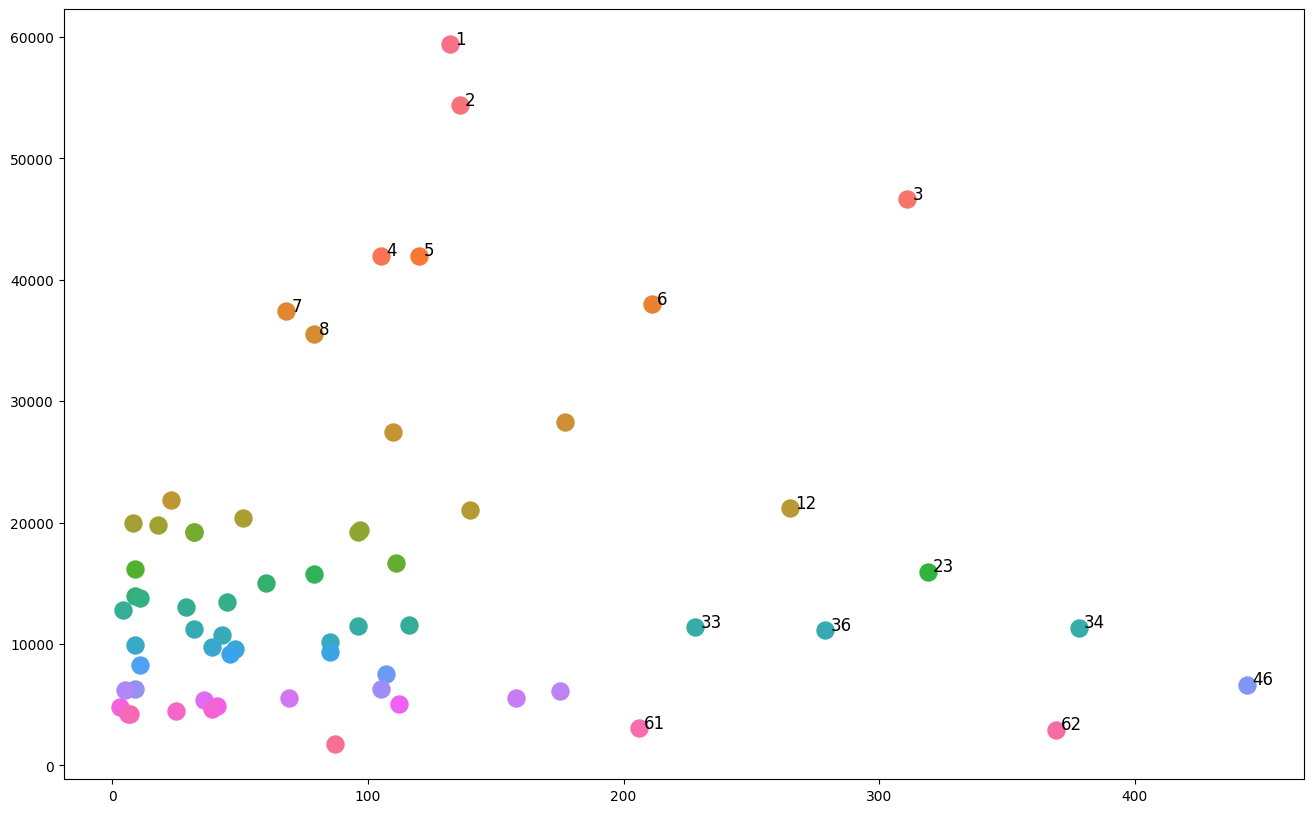

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(16, 10))

# Generate a color palette with a unique color for each product
palette = sns.color_palette("husl", len(product_performance))

# Create a scatter plot with unique colors for each product
for i, product in enumerate(product_performance.index):
    plt.scatter(product_performance['Total Quantity Sold'][i],
                product_performance['Total Revenue'][i],
                color=palette[i],
                s=150,
                label=product)

# Annotate only key products to reduce clutter
for i, product in enumerate(product_performance.index):
    if product_performance['Total Revenue'][i] > 30000 or product_performance['Total Quantity Sold'][i] > 200:
        plt.text(product_performance['Total Quantity Sold'][i] + 2,
                 product_performance['Total Revenue'][i],
                 str(i+1),
                 fontsize=12, ha='left')

#


In [13]:
# Define thresholds
high_revenue_threshold = product_performance['Total Revenue'].quantile(0.75)
high_quantity_threshold = product_performance['Total Quantity Sold'].quantile(0.75)

# Classify products into segments
def classify_product(row):
    if row['Total Revenue'] > high_revenue_threshold and row['Total Quantity Sold'] > high_quantity_threshold:
        return 'High Revenue & High Quantity'
    elif row['Total Revenue'] > high_revenue_threshold:
        return 'High Revenue & Low Quantity'
    elif row['Total Quantity Sold'] > high_quantity_threshold:
        return 'Low Revenue & High Quantity'
    else:
        return 'Low Revenue & Low Quantity'

product_performance['Performance Category'] = product_performance.apply(classify_product, axis=1)

# Display the categorized product performance
print(product_performance)


                   Total Revenue  Total Quantity Sold  \
Product Name                                            
Kadhai medium              59400                  132   
Patila 2l                  54400                  136   
Bhoj Thali                 46650                  311   
Bucket (Steel)             42000                  105   
Kadhai small               42000                  120   
...                          ...                  ...   
Tawa (Non-stick)            4200                    6   
Cooker 2L (Pigon)           4200                    7   
Fork (Singular)             3090                  206   
Spoon 4-Inch                2952                  369   
Peeler                      1740                   87   

                           Performance Category  
Product Name                                     
Kadhai medium      High Revenue & High Quantity  
Patila 2l          High Revenue & High Quantity  
Bhoj Thali         High Revenue & High Quantity  
Bucket (

In [16]:
high_revenue_threshold = product_performance['Total Revenue'].quantile(0.75)
high_quantity_threshold = product_performance['Total Quantity Sold'].quantile(0.75)

# Classify products into segments
def classify_product(row):
    if row['Total Revenue'] > high_revenue_threshold and row['Total Quantity Sold'] > high_quantity_threshold:
        return 'High Revenue & High Quantity'
    elif row['Total Revenue'] > high_revenue_threshold:
        return 'High Revenue & Low Quantity'
    elif row['Total Quantity Sold'] > high_quantity_threshold:
        return 'Low Revenue & High Quantity'
    else:
        return 'Low Revenue & Low Quantity'

product_performance['Performance Category'] = product_performance.apply(classify_product, axis=1)

# Reset index to include product names as a column
product_performance_reset = product_performance.reset_index()

# Save the categorized product performance with product names to a CSV file
product_performance_reset.to_csv('categorized_product_performance_with_names.csv', index=False)

print("The categorized product performance with product names has been saved to 'categorized_product_performance_with_names.csv'")


The categorized product performance with product names has been saved to 'categorized_product_performance_with_names.csv'
